In [6]:
from vivarium import Artifact
import pandas as pd
import numpy as np
#import seaborn as sns
#import matplotlib.pyplot as plt
from db_queries import get_ids, get_outputs
import scipy.stats

In [2]:
output_dirs = ['/ihme/costeffectiveness/results/vivarium_gates_bep/scenarios_fixed/india/2020_02_06_17_37_48/count_data/',
                '/ihme/costeffectiveness/results/vivarium_gates_bep/scenarios_fixed/pakistan/2020_02_06_17_38_45/count_data/',
              '/share/costeffectiveness/results/vivarium_gates_bep/scenarios_fixed/tanzania/2020_02_06_17_39_16/count_data/',
              '/share/costeffectiveness/results/vivarium_gates_bep/scenarios_fixed/mali/2020_02_06_17_38_33/count_data/']

locations = ['India',
            'Pakistan',
            'Tanzania',
            'Mali']

In [46]:
deaths = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/scenarios_fixed/india/2020_02_06_17_37_48/count_data/deaths.hdf')
deaths = (deaths.where(deaths['scenario'] == 'baseline').dropna()
          .groupby(['cause','input_draw','age_group'], as_index=False).sum()
          .rename(columns={'value':'deaths'}))

acmr = deaths.groupby(['input_draw','age_group'], as_index=False).sum()
acmr['cause'] = 'all'

deaths = deaths.append(acmr)

pt = pd.read_hdf('/ihme/costeffectiveness/results/vivarium_gates_bep/scenarios_fixed/india/2020_02_06_17_37_48/count_data/person_time.hdf')
pt = (pt.where(pt['scenario'] == 'baseline').dropna()
      .groupby(['input_draw','age_group'], as_index=False).sum()
      .rename(columns={'value':'person_time'}))
deaths = deaths.merge(pt, right_on=['input_draw','age_group'],
                   left_on=['input_draw','age_group'])
deaths['csmr'] = deaths['deaths'] / deaths['person_time']
deaths = deaths.groupby(['cause','age_group'], as_index=False).mean()
deaths.head()

,cause,age_group,deaths,input_draw,person_time,csmr
0,all,1_to_4,135.36,469.44,97265.096372,0.001392
1,all,1mo_to_6mo,484.00,469.44,41600.107502,0.011635
2,all,6mo_to_1,570.12,469.44,48875.624476,0.011665
3,all,early_neonatal,1202.72,469.44,1905.649499,0.631157
4,all,late_neonatal,276.72,469.44,5676.634539,0.048749


Text(0, 0.5, 'Proportion')

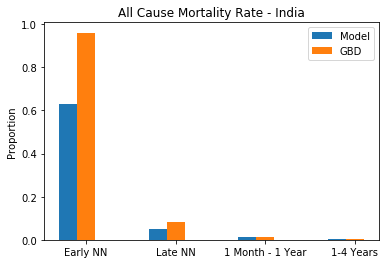

In [64]:
data = deaths.where(deaths['cause'] == 'all').dropna().sort_values(by='age_group')
data['order'] = [4,0,3,1,2]
data = data.sort_values(by='order').where(data['order'] != 0).dropna()

gbd = get_outputs(location_id=163, year_id=2017, gbd_round_id=5, 
                    topic='cause', cause_id=294, measure_id=1, metric_id=3,
                    age_group_id=[2,3,4,5])

# bar width
barWidth = 0.2

# bar heights
model = data['csmr'].where(data['cause'] == 'all').dropna()
gbd = gbd['val']

# bar positions
a = np.arange(len(model))
b = [x + barWidth for x in a]


# plot 
plt.bar(a, model, width=barWidth)
plt.bar(b, gbd, width=barWidth)

plt.xticks([r + barWidth for r in range(len(model))], ['Early NN','Late NN','1 Month - 1 Year','1-4 Years'])
plt.legend(['Model','GBD'])
plt.title('All Cause Mortality Rate - India')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

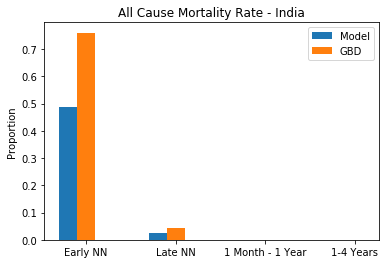

In [65]:
data = deaths.where(deaths['cause'] == 'neonatal_disorders').dropna().sort_values(by='age_group')
data['order'] = [4,0,3,1,2]
data = data.sort_values(by='order').where(data['order'] != 0).dropna()

gbd = get_outputs(location_id=163, year_id=2017, gbd_round_id=5, 
                    topic='cause', cause_id=380, measure_id=1, metric_id=3,
                    age_group_id=[2,3,4,5])

# bar width
barWidth = 0.2

# bar heights
model = data['csmr']
gbd = gbd['val']

# bar positions
a = np.arange(len(model))
b = [x + barWidth for x in a]


# plot 
plt.bar(a, model, width=barWidth)
plt.bar(b, gbd, width=barWidth)

plt.xticks([r + barWidth for r in range(len(model))], ['Early NN','Late NN','1 Month - 1 Year','1-4 Years'])
plt.legend(['Model','GBD'])
plt.title('All Cause Mortality Rate - India')
plt.ylabel('Proportion')

Text(0, 0.5, 'Proportion')

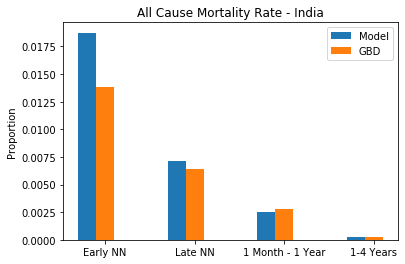

In [70]:
data = deaths.where(deaths['cause'] == 'diarrheal_diseases').dropna().sort_values(by='age_group')
data['order'] = [4,0,3,1,2]
data = data.sort_values(by='order').where(data['order'] != 0).dropna()

gbd = get_outputs(location_id=163, year_id=2017, gbd_round_id=5, 
                    topic='cause', cause_id=302, measure_id=1, metric_id=3,
                    age_group_id=[2,3,4,5])

# bar width
barWidth = 0.2

# bar heights
model = data['csmr']
gbd = gbd['val']

# bar positions
a = np.arange(len(model))
b = [x + barWidth for x in a]


# plot 
plt.bar(a, model, width=barWidth)
plt.bar(b, gbd, width=barWidth)

plt.xticks([r + barWidth for r in range(len(model))], ['Early NN','Late NN','1 Month - 1 Year','1-4 Years'])
plt.legend(['Model','GBD'])
plt.title('All Cause Mortality Rate - India')
plt.ylabel('Proportion')